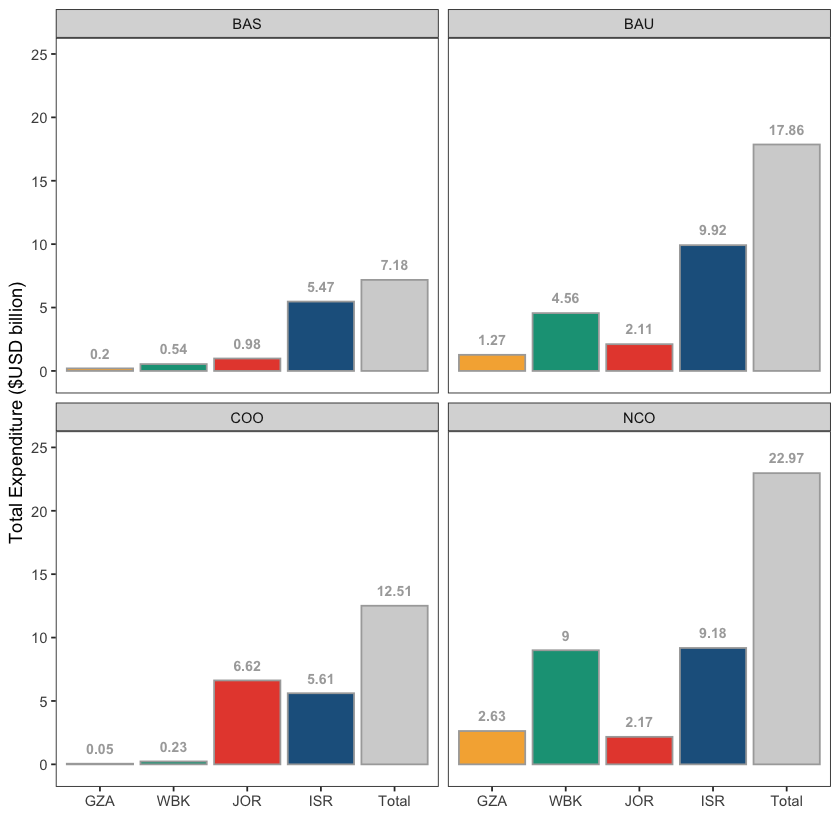

In [99]:
# ************************************************************************* ----
# Params ----
# ************************************************************************* ----

library(ggplot2)
library(viridis)

# ************************************************************************* ----
# Load data ----
# ************************************************************************* ----

# read data
cost_data = read.csv(file = '../outputs/results/merged_totex_results.csv')

# remove EAG scenario
cost_data = cost_data[cost_data$scenario != 'EAG',]

# adjust territory naming 
cost_data[cost_data$territory == "Gaza", "territory"] <- "GZA"
cost_data[cost_data$territory == "Israel", "territory"] <- "ISR"
cost_data[cost_data$territory == "Jordan", "territory"] <- "JOR"
cost_data[cost_data$territory == "West Bank", "territory"] <- "WBK"

# define precision
cost_data$total = round(cost_data$total,2)

# ************************************************************************* ----
# GRAPH ----
# ************************************************************************* ----

ggplot(cost_data, 
       aes(fill=territory, 
           y=total, 
           x=factor(territory, level = c('GZA','WBK','JOR','ISR','Total')))
    ) + 
    geom_bar(position="dodge",
             stat="identity",
             colour="darkgray",
    ) +
    geom_text(aes(label=total), 
              vjust = -1, 
              color = "darkgray", 
              size = 3,
              fontface = "bold"
    ) +
    scale_fill_manual(values=c(# Gaza
                               "#f5b041",
                               # Israel
                               "#1f618d",
                               # Jordan
                               "#e74c3c",
                               # total
                               "lightgray",
                               # west bank
                               "#16a085")
    ) +
    facet_wrap(~scenario
    ) +
    theme_bw(
    ) + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="none",
    ) + 
    xlab(""
    ) + 
    ylab("Total Expenditure ($USD billion)"
    ) +
    labs(fill=''
    ) +
    scale_y_continuous(limits = c(-0.5, 25)
    )

# save figure
ggsave("../outputs/figures/oms_totex_by_scenario.png", 
       width = 12.5, 
       height = 12.5, 
       units = "cm")